In [ ]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 재시작

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/mnt')\

Mounted at /content/mnt


In [ ]:
result_folder = '/content/mnt/MyDrive/results/CoffeeIndex'

In [ ]:
from glob import glob
for file in glob(f'{result_folder}/*.csv'):
    print(file)

/content/mnt/MyDrive/results/CoffeeIndex/스타벅스.csv
/content/mnt/MyDrive/results/CoffeeIndex/커피빈.csv
/content/mnt/MyDrive/results/CoffeeIndex/이디야.csv
/content/mnt/MyDrive/results/CoffeeIndex/빽다방.csv


In [ ]:
df = pd.read_csv(f'{result_folder}/스타벅스.csv', encoding='utf-8')
print(df.shape)
df.head()

(1547, 5)


,상호명,지점명,시도명,시군구명,도로명주소
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153
2,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55
4,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88


In [ ]:
tmp_gu_dict = {
    '수원':['장안구', '권선구', '팔달구', '영통구'], 
    '성남':['수정구', '중원구', '분당구'], 
    '안양':['만안구', '동안구'], 
    '안산':['상록구', '단원구'], 
    '고양':['덕양구', '일산동구', '일산서구'], 
    '용인':['처인구', '기흥구', '수지구'], 
    '청주':['상당구', '서원구', '흥덕구', '청원구'], 
    '천안':['동남구', '서북구'], 
    '전주':['완산구', '덕진구'], 
    '포항':['남구', '북구'], 
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [ ]:
metro_list = ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']


def get_ID(df):
    si_name = [None] * len(df)
    for i in df.index:
        if df.시도명[i] in metro_list:
            if len(df.시군구명[i]) == 2:
                si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i]
            else:
                si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i][:-1]     # 긴 구 이름에서 '구' 제외
        else:
            si_len = len(df.시군구명[i].split())
            if si_len == 1:
                if df.시군구명[i][:-1] == '고성':
                    if df.시도명[i] == '강원도':
                        si_name[i] = '고성(강원)'
                    else:
                        si_name[i] = '고성(경남)'
                elif df.시군구명[i][:2] == '세종':
                    si_name[i] = '세종'
                elif df.시군구명[i][:2] in tmp_gu_dict.keys():
                    si_name[i] = df['도로명주소'][i].split()[1][:2] + ' ' + df['도로명주소'][i].split()[2][:-1]
                else:
                    si_name[i] = df.시군구명[i][:-1]
            else:
                _, admingu = df.시군구명[i].split()
                for key, values in tmp_gu_dict.items():
                    if admingu in values:
                        if len(admingu) == 2:
                            si_name[i] = key + ' ' + admingu
                        elif admingu in ['마산합포구', '마산회원구']:
                            si_name[i] = key + ' ' + admingu[2:-1]
                        else:
                            si_name[i] = key + ' ' + admingu[:-1]
    
    return si_name

In [ ]:
df['ID'] = get_ID(df)
# del df['시도명']
# del df['시군구명']
df.head(60)

## 반복문으로 전체

In [ ]:
list = []
for file in glob(f'{result_folder}/*.csv'):
    list.append(file)

list

['/content/mnt/MyDrive/results/CoffeeIndex/스타벅스.csv',
 '/content/mnt/MyDrive/results/CoffeeIndex/커피빈.csv',
 '/content/mnt/MyDrive/results/CoffeeIndex/이디야.csv',
 '/content/mnt/MyDrive/results/CoffeeIndex/빽다방.csv']

In [ ]:
a= list[0]
a[41:-4]

'스타벅스'

In [ ]:
result_dir = f'{result_folder}/전처리'

In [ ]:
!mkdir -p $result_dir

In [ ]:
for filename in list:
    # 파일 불러오기
    df = pd.read_csv(f'{filename}', encoding='utf-8')


    df['ID'] = get_ID(df)

    df.to_csv(f'{result_folder}/전처리/{filename[41:-4]}_전처리.csv', index=False)

## ID별로 커피 점포수 계산하기

In [ ]:
for file in glob(f'{result_folder}/전처리/*.csv'):
    print(file)

/content/mnt/MyDrive/results/CoffeeIndex/전처리/스타벅스_전처리.csv
/content/mnt/MyDrive/results/CoffeeIndex/전처리/커피빈_전처리.csv
/content/mnt/MyDrive/results/CoffeeIndex/전처리/이디야_전처리.csv
/content/mnt/MyDrive/results/CoffeeIndex/전처리/빽다방_전처리.csv


In [ ]:
df = pd.read_csv(f'{result_folder}/전처리/스타벅스_전처리.csv', encoding='utf-8')
df

,상호명,지점명,시도명,시군구명,도로명주소,ID
0,스타벅스강릉안목항점,강릉안목항점,강원도,강릉시,강원도 강릉시 창해로14번길 40,강릉
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원)
2,스타벅스춘천후평DT점,춘천후평DT점,강원도,춘천시,강원도 춘천시 후석로 318,춘천
3,스타벅스,춘천명동점,강원도,춘천시,강원도 춘천시 중앙로 55,춘천
4,스타벅스설악워터피아점,설악워터피아점,강원도,속초시,강원도 속초시 미시령로2983번길 88,속초
...,...,...,...,...,...,...
1542,스타벅스,충북대점,충청북도,청주시 서원구,충청북도 청주시 서원구 내수동로 113,청주 서원
1543,스타벅스,청주율량DT점,충청북도,청주시 청원구,충청북도 청주시 청원구 충청대로107번길 8,청주 청원
1544,스타벅스,충주연수점,충청북도,충주시,충청북도 충주시 계명대로 227,충주
1545,스타벅스,충주성서점,충청북도,충주시,충청북도 충주시 예성로 151,충주


In [ ]:
df_group = df.groupby(df.ID).count()
df_group = df_group[['상호명']]
df_group.columns = ['스타벅스']
df_group

,스타벅스
ID,
가평,2
강릉,5
거제,6
경산,8
경주,8
...,...
하동,1
함양,1
홍천,2


In [308]:
# 함수만들기
def df_count(df, name):
    df_group = df.groupby(df.ID).count()
    df_group = df_group[['상호명']]
    df_group.columns = [f'{name}']
    
    return df_group

- 반복문으로 한방에

In [309]:
list = []
for file in glob(f'{result_folder}/전처리/*.csv'):
    list.append(file)

list

['/content/mnt/MyDrive/results/CoffeeIndex/전처리/스타벅스_전처리.csv',
 '/content/mnt/MyDrive/results/CoffeeIndex/전처리/커피빈_전처리.csv',
 '/content/mnt/MyDrive/results/CoffeeIndex/전처리/이디야_전처리.csv',
 '/content/mnt/MyDrive/results/CoffeeIndex/전처리/빽다방_전처리.csv',
 '/content/mnt/MyDrive/results/CoffeeIndex/전처리/전처리종합.csv']

In [310]:
stb = pd.read_csv(f'{list[0]}', encoding='utf-8')
cfb = pd.read_csv(f'{list[1]}', encoding='utf-8')
edy = pd.read_csv(f'{list[2]}', encoding='utf-8')
pdb = pd.read_csv(f'{list[3]}', encoding='utf-8')

In [312]:
stb = df_count(stb, '스타벅스')
cfb = df_count(cfb, '커피빈')
edy = df_count(edy, '이디야')
pdb = df_count(pdb, '빽다방')

In [313]:
df_all = pd.merge(edy, stb, how='left', on='ID')
df_all = pd.merge(df_all, cfb, how='left', on='ID')
df_all = pd.merge(df_all, pdb, how='left', on='ID')
print(df_all.shape)
df_all.head(7)

(237, 4)


,이디야,스타벅스,커피빈,빽다방
ID,,,,
가평,9,2.0,NaN,NaN
강릉,15,5.0,NaN,2.0
강진,1,NaN,NaN,NaN
거제,9,6.0,NaN,NaN
거창,1,NaN,NaN,1.0
경산,9,8.0,NaN,4.0
경주,25,8.0,2.0,1.0


In [314]:
# NaN 제거
df_all = df_all.fillna(0)
df_all

,이디야,스타벅스,커피빈,빽다방
ID,,,,
가평,9,2.0,0.0,0.0
강릉,15,5.0,0.0,2.0
강진,1,0.0,0.0,0.0
거제,9,6.0,0.0,0.0
거창,1,0.0,0.0,1.0
...,...,...,...,...
홍천,3,2.0,0.0,1.0
화성,28,16.0,5.0,10.0
화순,1,0.0,0.0,1.0


- 커피지수

In [317]:
df_all['커피지수'] = ((df_all['스타벅스'] + df_all['커피빈']) / (df_all['이디야'] + df_all['빽다방']))
df_all.head()

,이디야,스타벅스,커피빈,빽다방,커피지수
ID,,,,,
가평,9,2.0,0.0,0.0,0.222222
강릉,15,5.0,0.0,2.0,0.294118
강진,1,0.0,0.0,0.0,0.000000
거제,9,6.0,0.0,0.0,0.666667
거창,1,0.0,0.0,1.0,0.000000


In [318]:
df_all.reset_index(inplace=True)
df_all.head()

,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,가평,9,2.0,0.0,0.0,0.222222
1,강릉,15,5.0,0.0,2.0,0.294118
2,강진,1,0.0,0.0,0.0,0.000000
3,거제,9,6.0,0.0,0.0,0.666667
4,거창,1,0.0,0.0,1.0,0.000000


In [326]:
map_raw = pd.read_excel('/content/mnt/MyDrive/Data/인구소멸위기지역/draw_korea_raw(2021).xlsx')
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace = True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [327]:
map.columns = ['y', 'x', 'ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [321]:
data_folder = '/content/mnt/MyDrive/Data/인구소멸위기지역'
!cp $data_folder/draw_map.py .
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

In [329]:
df_all = pd.merge(df_all, map, how='left', on='ID')
print(df_all.shape)
df_all.head()

(237, 8)


,ID,이디야,스타벅스,커피빈,빽다방,커피지수,y,x
0,가평,9,2.0,0.0,0.0,0.222222,3.0,7.0
1,강릉,15,5.0,0.0,2.0,0.294118,3.0,11.0
2,강진,1,0.0,0.0,0.0,0.000000,24.0,1.0
3,거제,9,6.0,0.0,0.0,0.666667,22.0,8.0
4,거창,1,0.0,0.0,1.0,0.000000,16.0,6.0


In [332]:
# Null 데이터가 있는지 확인
df_all.isnull().sum()

ID      0
이디야     0
스타벅스    0
커피빈     0
빽다방     0
커피지수    0
y       1
x       1
dtype: int64

In [344]:
df_all.dropna(inplace=True)
df_all.shape

(236, 8)

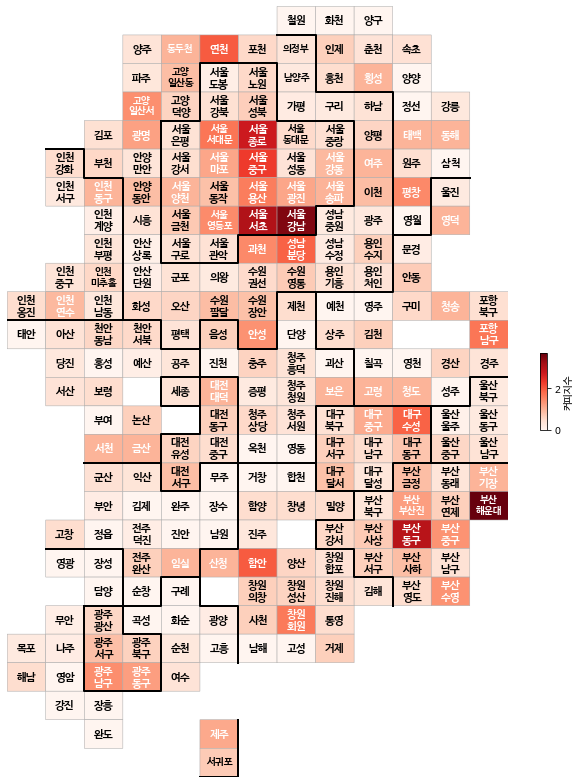

In [352]:
drawKorea('커피지수', df_all, 'Reds')

In [351]:
df_all.to_csv('/content/mnt/MyDrive/results/CoffeeIndex/커피지수.csv', index=False)